___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("weather.csv")

In [3]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.shape

(8022, 26)

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [11]:
weather[['TMIN', 'TAVG', 'TMAX']].describe() # bu uc stunu date frame olarak almak icin cift parantez alacaz

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


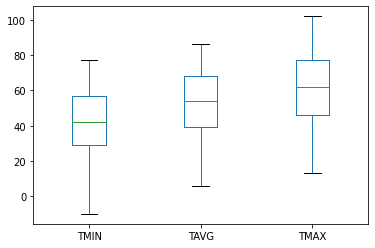

In [12]:
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

***

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [13]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [15]:
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

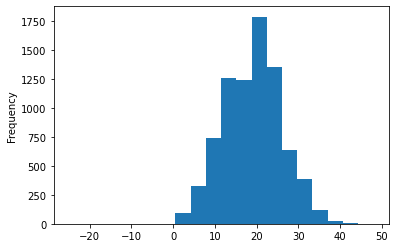

In [16]:
weather['TDIFF'].plot(kind='hist',bins=20)

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [17]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [19]:
WT = weather.loc[:, 'WT01' : 'WT22'] # tum kotu hava durumlarini iceren 

In [20]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
weather['bad_conditions'] = WT.sum(axis='columns') # yeni bir sutun olusturuyoruz. stunlar arasinda iter

In [22]:
weather.bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [ ]:
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

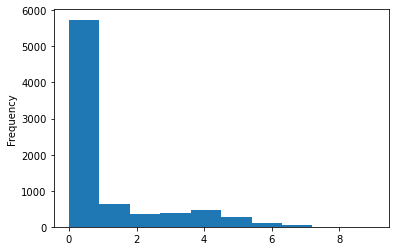

In [23]:
weather['bad_conditions'].plot(kind='hist')

In [24]:
weather.bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

***

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [25]:
weather.bad_conditions.value_counts(dropna = False).sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [26]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse',
    7:'worse', 8:'worse', 9:'worse'}

""""""# maping = dict()
for i in WT.bad_conditions.unique():
    if i == 0:
        maping[i] = "good"
    elif i > 0 and i < 5:
        maping[i] = "bad"
    else:
        maping[i] = "worse""""

In [27]:
weather['rating'] = weather.bad_conditions.map(mapping) # 

In [28]:
weather['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [29]:
weather.head(2)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0,good


***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [30]:
weather.rating[0]

'good'

In [31]:
type(weather.rating[0])

str

In [32]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [34]:
# Change the data type of 'rating' to category
weather['rating'] = pd.Categorical(weather["rating"], ordered=True, categories=cats )

In [35]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [37]:
weather.rating.tail()

8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [38]:
weather.rating.min()

'good'

In [39]:
weather.rating.max()

'worse'

In [40]:
weather.rating.sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [42]:
import pandas as pd
ri = pd.read_csv('RI_cleaned.csv', nrows=50000)
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)
ri.dropna(subset=['driver_gender'], inplace=True)
ri['is_arrested'] = ri.is_arrested.astype('bool')
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.set_index('stop_datetime', inplace=True)

C:\Users\Mustafa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [59]:
ri.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [44]:
weather_rating = weather[["DATE", "rating"]]

In [45]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [46]:
weather_rating.shape

(8022, 2)

In [47]:
weather_rating.DATE.nunique()

4017

In [48]:
ri.stop_date[3]

'2005-01-06'

In [49]:
weather_rating.DATE[3]

'2005-01-04'

In [50]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on = 'stop_date', right_on = "DATE", how = "left") # ikidata frame birlestiriyoruz merge yapiyoruz

In [51]:
ri_weather.shape

(95877, 24)

In [53]:
ri.shape

(48010, 22)

In [54]:
ri.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [55]:
weather_rating.columns

Index(['DATE', 'rating'], dtype='object')

In [56]:
ri_weather.columns

Index(['id', 'stop_date', 'stop_time', 'location_raw', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district', 'DATE', 'rating'],
      dtype='object')

In [58]:
ri_weather.set_index("stop_datetime", inplace=True)

KeyError: "None of ['stop_datetime'] are in the columns"

***

## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [60]:
ri_weather.is_arrested.mean()

0.05181638974936638

In [62]:
ri_weather.groupby("rating").is_arrested.mean()

rating
good     0.051263
bad      0.051462
worse    0.062559
Name: is_arrested, dtype: float64

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [64]:
ri_weather.groupby(["violation","rating"]).is_arrested.mean()

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [65]:
arrest_rate = ri_weather.groupby(["violation","rating"]).is_arrested.mean()

In [66]:
arrest_rate

violation            rating
Equipment            good      0.121123
                     bad       0.125000
                     worse     0.150943
Moving violation     good      0.114006
                     bad       0.116299
                     worse     0.133835
Other                good      0.275689
                     bad       0.283368
                     worse     0.270833
Registration/plates  good      0.196108
                     bad       0.214286
                     worse     0.166667
Speeding             good      0.023061
                     bad       0.021220
                     worse     0.026168
Name: is_arrested, dtype: float64

In [67]:
arrest_rate.loc["Moving violation", "bad"]

0.11629857422421024

In [68]:
arrest_rate.loc["Speeding"]

rating
good     0.023061
bad      0.021220
worse    0.026168
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [69]:
arrest_rate.unstack() # unstack` seriyi dataframe donduruyor

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168


In [70]:
ri_weather.pivot_table(index = "violation")

,contraband_found,driver_age,driver_age_raw,drugs_related_stop,is_arrested,search_conducted
violation,,,,,,
Equipment,0.033797,31.043544,1962.255302,0.022531,0.123757,0.114480
Moving violation,0.019185,34.923083,1960.825800,0.011511,0.115647,0.080500
Other,0.034831,34.245338,1902.760112,0.014607,0.277528,0.128090
Registration/plates,0.029392,31.442916,1967.594668,0.021873,0.199590,0.157211
Speeding,0.006296,33.075495,1967.846610,0.003800,0.022689,0.022038


In [71]:
ri_weather.pivot_table(index = "violation", columns = "rating", values = "is_arrested")

rating,good,bad,worse
violation,,,
Equipment,0.121123,0.125000,0.150943
Moving violation,0.114006,0.116299,0.133835
Other,0.275689,0.283368,0.270833
Registration/plates,0.196108,0.214286,0.166667
Speeding,0.023061,0.021220,0.026168
